Ma trận tương quan giữa các thuộc tính (có year):
                                           LandAverageTemperature  \
LandAverageTemperature                                   1.000000   
LandAverageTemperatureUncertainty                       -0.143129   
LandMaxTemperature                                       0.995807   
LandMaxTemperatureUncertainty                           -0.108462   
LandMinTemperature                                       0.995611   
LandMinTemperatureUncertainty                           -0.167451   
LandAndOceanAverageTemperature                           0.988066   
LandAndOceanAverageTemperatureUncertainty               -0.131412   
year                                                     0.095921   
month                                                    0.265959   

                                           LandAverageTemperatureUncertainty  \
LandAverageTemperature                                             -0.143129   
LandAverageTemperatureUncertai

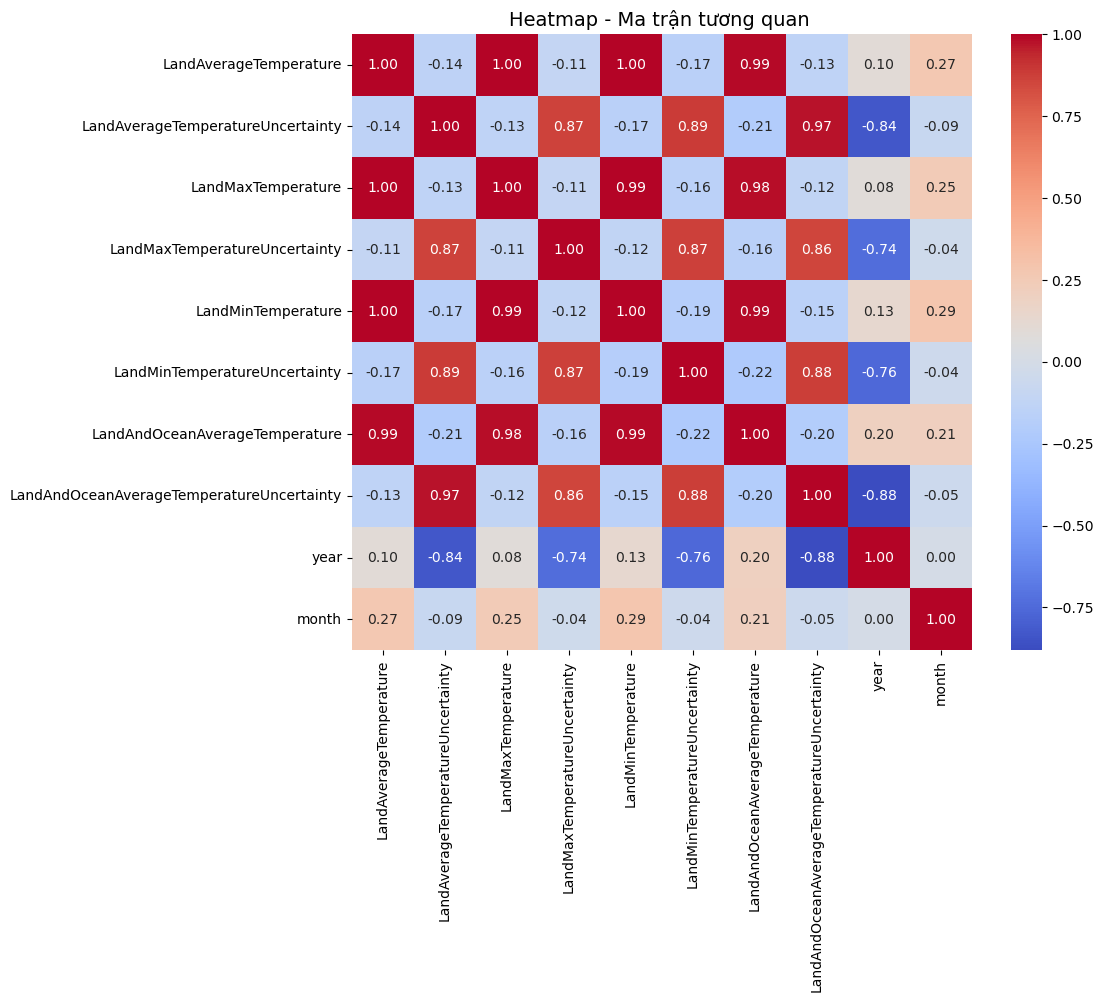

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df_r = pd.read_csv("GlobalTemperatures.csv", parse_dates=["dt"])
df = df_r[df_r["dt"] >= "1850-01-01"].copy()

# Thêm cột năm (numeric) từ datetime
df["year"] = df["dt"].dt.year
df["month"] = df["dt"].dt.month
# Hoặc có thể dùng timestamp: df["timestamp"] = df["dt"].astype("int64") // 10**9
df.head()
# Chọn cột số
numeric_cols = df.select_dtypes(include=["float64", "int32"])

# Tính ma trận tương quan
corr_matrix = numeric_cols.corr()

# In ra ma trận
print("Ma trận tương quan giữa các thuộc tính (có year):")
print(corr_matrix)

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,          # hiển thị số trên ô
    cmap="coolwarm",     # màu sắc xanh - đỏ
    fmt=".2f",           # format 2 chữ số thập phân
    cbar=True
)
plt.title("Heatmap - Ma trận tương quan ", fontsize=14)
plt.show()


In [2]:
import pandas as pd
df = pd.read_csv("GlobalTemperatures.csv", parse_dates=["dt"])
df["year"] = df["dt"].dt.year
df["month"] = df["dt"].dt.month
# df = df.drop(columns = ["dt"])
# df.to_csv(path_or_buf="GlobalTemperaturesNew.csv", sep=',', index=False)
df = df[df["dt"] >= "1850-01-01"]
df[df["month"] == 1].count()


dt                                           166
LandAverageTemperature                       166
LandAverageTemperatureUncertainty            166
LandMaxTemperature                           166
LandMaxTemperatureUncertainty                166
LandMinTemperature                           166
LandMinTemperatureUncertainty                166
LandAndOceanAverageTemperature               166
LandAndOceanAverageTemperatureUncertainty    166
year                                         166
month                                        166
dtype: int64

# Xử lý dữ liệu ở phía bên dưới, bên trên là mô hình cũ

In [3]:
import pandas as pd
df = pd.read_csv("GlobalTemperatures.csv", parse_dates=["dt"])
df


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


### Thêm cột "year" và xóa những bản ghi trước năm 1850

In [4]:
df["year"] = df["dt"].dt.year
df = df[df["year"] >=1850]
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1850
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,1850
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,1850
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,1850
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,1850


### Xóa cột "dt"

In [5]:
df = df.drop(columns="dt")

df.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year
1200,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1850
1201,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,1850
1202,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,1850
1203,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,1850
1204,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,1850


### Nhóm các thuộc tính còn lại theo "year"

In [6]:
group = df.groupby("year")[df.drop(columns="year").columns].mean()
group

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
year,,,,,,,,
1850,7.900667,0.876417,13.476667,2.394833,1.964333,1.571167,14.867167,0.308167
1851,8.178583,0.881917,13.081000,2.397250,2.203917,1.632417,14.991833,0.312083
1852,8.100167,0.918250,13.397333,2.619250,2.337000,1.382917,15.006500,0.316417
1853,8.041833,0.835000,13.886583,2.095083,1.892500,1.355583,14.955167,0.283833
1854,8.210500,0.825667,13.977417,1.783333,1.762167,1.357000,14.991000,0.276417
...,...,...,...,...,...,...,...,...
2011,9.516000,0.082000,15.284833,0.114333,3.827667,0.136583,15.769500,0.059000
2012,9.507333,0.083417,15.332833,0.107333,3.756167,0.145333,15.802333,0.061500
2013,9.606500,0.097667,15.373833,0.115500,3.911333,0.149833,15.854417,0.064667


### Chuẩn hóa dữ liệu bằng sklearn

In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

feature_cols = ['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty']

X = group[feature_cols]

temperature_features = ['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty']

# Tạo ColumnTransformer để xử lý từng phần
preprocessor = ColumnTransformer(transformers=[
    ('temp_scaler', StandardScaler(), temperature_features)
])

In [8]:
X

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
year,,,,,,,,
1850,7.900667,0.876417,13.476667,2.394833,1.964333,1.571167,14.867167,0.308167
1851,8.178583,0.881917,13.081000,2.397250,2.203917,1.632417,14.991833,0.312083
1852,8.100167,0.918250,13.397333,2.619250,2.337000,1.382917,15.006500,0.316417
1853,8.041833,0.835000,13.886583,2.095083,1.892500,1.355583,14.955167,0.283833
1854,8.210500,0.825667,13.977417,1.783333,1.762167,1.357000,14.991000,0.276417
...,...,...,...,...,...,...,...,...
2011,9.516000,0.082000,15.284833,0.114333,3.827667,0.136583,15.769500,0.059000
2012,9.507333,0.083417,15.332833,0.107333,3.756167,0.145333,15.802333,0.061500
2013,9.606500,0.097667,15.373833,0.115500,3.911333,0.149833,15.854417,0.064667


In [9]:
X_processed = preprocessor.fit_transform(X)

### Biến đổi dữ liệu thành dataFrame có 6 thuộc tính: Nam_1 ... Nam_6
#### Mỗi cell là một vecto có 8 phần tử 
#### Nam_6 là biến mục tiêu

In [ ]:
import numpy as np
preProcess = {
    "Nam_1":[],
    "Nam_2" : [],
    "Nam_3":[],
    "Nam_4" : [],
    "Nam_5": [],
    "Nam_6" : []
}


# for Nam in preProcess.keys():
vectos =[]    
for index, row in group.iterrows():
    vecto = np.array([])
    for item in row:
        vecto = np.append(vecto, item)
    vectos.append(vecto)
    
i = 0         
for index in range(len(vectos)):
    for p in range(index, index+6):
        Nam = f"Nam_{i%6+1}"
        preProcess[Nam].append((list)(vectos[p]))
        i+=1
    if index == len(vectos)-7:
        break

print(type(preProcess["Nam_1"][1]))
print(preProcess["Nam_6"][0])


<class 'list'>
[8.11075, 0.8871666666666668, 13.493166666666667, 1.3314166666666667, 1.7028333333333332, 1.6553333333333333, 15.021083333333335, 0.2911666666666667]


In [11]:
new_df = pd.DataFrame(preProcess)
new_df

,Nam_1,Nam_2,Nam_3,Nam_4,Nam_5,Nam_6
0,"[7.900666666666667, 0.8764166666666666, 13.476...","[8.178583333333334, 0.8819166666666667, 13.081...","[8.100166666666667, 0.91825, 13.39733333333333...","[8.041833333333333, 0.835, 13.886583333333334,...","[8.2105, 0.8256666666666667, 13.97741666666666...","[8.11075, 0.8871666666666668, 13.4931666666666..."
1,"[8.178583333333334, 0.8819166666666667, 13.081...","[8.100166666666667, 0.91825, 13.39733333333333...","[8.041833333333333, 0.835, 13.886583333333334,...","[8.2105, 0.8256666666666667, 13.97741666666666...","[8.11075, 0.8871666666666668, 13.4931666666666...","[7.995916666666666, 0.7607499999999999, 13.470..."
2,"[8.100166666666667, 0.91825, 13.39733333333333...","[8.041833333333333, 0.835, 13.886583333333334,...","[8.2105, 0.8256666666666667, 13.97741666666666...","[8.11075, 0.8871666666666668, 13.4931666666666...","[7.995916666666666, 0.7607499999999999, 13.470...","[7.758166666666667, 0.7510833333333333, 13.437..."
3,"[8.041833333333333, 0.835, 13.886583333333334,...","[8.2105, 0.8256666666666667, 13.97741666666666...","[8.11075, 0.8871666666666668, 13.4931666666666...","[7.995916666666666, 0.7607499999999999, 13.470...","[7.758166666666667, 0.7510833333333333, 13.437...","[8.10025, 0.69975, 13.683, 1.87, 2.11075, 1.22..."
4,"[8.2105, 0.8256666666666667, 13.97741666666666...","[8.11075, 0.8871666666666668, 13.4931666666666...","[7.995916666666666, 0.7607499999999999, 13.470...","[7.758166666666667, 0.7510833333333333, 13.437...","[8.10025, 0.69975, 13.683, 1.87, 2.11075, 1.22...","[8.252, 0.6746666666666666, 13.860333333333335..."
...,...,...,...,...,...,...
155,"[9.700916666666666, 0.07516666666666667, 15.34...","[9.5325, 0.09000000000000001, 15.262, 0.149583...","[9.732166666666666, 0.08950000000000001, 15.53...","[9.43175, 0.07891666666666666, 15.191749999999...","[9.50525, 0.08591666666666666, 15.266583333333...","[9.703083333333334, 0.08341666666666665, 15.44..."
156,"[9.5325, 0.09000000000000001, 15.262, 0.149583...","[9.732166666666666, 0.08950000000000001, 15.53...","[9.43175, 0.07891666666666666, 15.191749999999...","[9.50525, 0.08591666666666666, 15.266583333333...","[9.703083333333334, 0.08341666666666665, 15.44...","[9.516, 0.08199999999999998, 15.28483333333333..."
157,"[9.732166666666666, 0.08950000000000001, 15.53...","[9.43175, 0.07891666666666666, 15.191749999999...","[9.50525, 0.08591666666666666, 15.266583333333...","[9.703083333333334, 0.08341666666666665, 15.44...","[9.516, 0.08199999999999998, 15.28483333333333...","[9.507333333333333, 0.08341666666666668, 15.33..."
158,"[9.43175, 0.07891666666666666, 15.191749999999...","[9.50525, 0.08591666666666666, 15.266583333333...","[9.703083333333334, 0.08341666666666665, 15.44...","[9.516, 0.08199999999999998, 15.28483333333333...","[9.507333333333333, 0.08341666666666668, 15.33...","[9.6065, 0.09766666666666667, 15.3738333333333..."


In [12]:
new_df.columns

Index(['Nam_1', 'Nam_2', 'Nam_3', 'Nam_4', 'Nam_5', 'Nam_6'], dtype='object')

### X là feature, Y là biến mục tiêu

In [13]:

X = new_df[['Nam_1', 'Nam_2', 'Nam_3', 'Nam_4', 'Nam_5']]
y = new_df['Nam_6']

### Chia tập train, test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train

,Nam_1,Nam_2,Nam_3,Nam_4,Nam_5
60,"[8.223, 0.26008333333333333, 14.09733333333333...","[8.177, 0.24783333333333335, 13.98783333333333...","[8.165416666666667, 0.2584166666666667, 14.053...","[8.29775, 0.26225000000000004, 14.201749999999...","[8.5905, 0.2519166666666667, 14.3145, 0.316666..."
115,"[8.527416666666666, 0.10883333333333334, 14.26...","[8.599333333333332, 0.09225, 14.32591666666666...","[8.700083333333334, 0.08366666666666667, 14.40...","[8.516333333333334, 0.11166666666666668, 14.16...","[8.595083333333333, 0.08516666666666667, 14.21..."
2,"[8.100166666666667, 0.91825, 13.39733333333333...","[8.041833333333333, 0.835, 13.886583333333334,...","[8.2105, 0.8256666666666667, 13.97741666666666...","[8.11075, 0.8871666666666668, 13.4931666666666...","[7.995916666666666, 0.7607499999999999, 13.470..."
123,"[8.94825, 0.10074999999999999, 14.566, 0.13125...","[8.4675, 0.1045, 14.081916666666666, 0.1226666...","[8.744833333333334, 0.09708333333333334, 14.38...","[8.34725, 0.10058333333333332, 14.008000000000...","[8.85025, 0.08466666666666667, 14.4855, 0.125,..."
45,"[8.147, 0.29925, 14.077666666666667, 0.4630833...","[8.214916666666667, 0.30883333333333335, 14.10...","[8.293333333333333, 0.31383333333333335, 14.18...","[8.177999999999999, 0.3256666666666667, 14.231...","[8.396333333333333, 0.32475, 14.33158333333333..."
...,...,...,...,...,...
71,"[8.571, 0.2568333333333333, 14.424416666666668...","[8.408, 0.25858333333333333, 14.20525, 0.31566...","[8.422166666666667, 0.2530833333333333, 14.181...","[8.506833333333335, 0.2568333333333333, 14.223...","[8.534416666666667, 0.24075, 14.34433333333333..."
106,"[8.279583333333333, 0.12083333333333333, 14.02...","[8.7325, 0.158, 14.381916666666667, 0.12041666...","[8.77375, 0.10433333333333332, 14.4775, 0.161,...","[8.732666666666667, 0.10716666666666667, 14.41...","[8.58375, 0.09349999999999999, 14.317416666666..."
14,"[7.983583333333333, 0.6764166666666668, 13.918...","[8.177833333333334, 0.6621666666666667, 14.298...","[8.292166666666667, 0.606, 14.165916666666668,...","[8.436333333333334, 0.6348333333333334, 14.146...","[8.247916666666667, 0.5463333333333333, 14.097..."
92,"[8.728416666666666, 0.2295, 14.53425, 0.238666...","[8.755083333333333, 0.22658333333333333, 14.60...","[8.845, 0.22516666666666665, 14.72716666666666...","[8.584833333333334, 0.22033333333333335, 14.43...","[8.676916666666667, 0.22241666666666668, 14.48..."


In [16]:
# new_df.to_csv(path_or_buf="GlobalTemperatures_idea.csv", sep=',', index=False)

### Sử dụng học máy truyền thống
#### Đổi X,Y sang array numpy thì mới huấn luyện được
#### Vì mỗi cell ở X là 1 vecto nên khó huân luyện nên dùng sum(row,[]) để nối toàn bộ vecto trong 1 hàng của X từ đó ta có ma trận 2D X và Y

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Chuyển đổi X_train, X_test, y_train, y_test từ list sang numpy array cho từng sample
def convert_X(X_df):
    # Mỗi cell là 1 list, ghép lại thành 2D array
    return np.array([np.array(sum(row, [])) for row in X_df.values])

def convert_y(y_series):
    return np.array([np.array(y) for y in y_series.values])

X_train_np = convert_X(X_train)
X_test_np = convert_X(X_test)
y_train_np = convert_y(y_train)
y_test_np = convert_y(y_test)

# Huấn luyện mô hình Linear Regression
lr = LinearRegression()
lr.fit(X_train_np, y_train_np)

# Dự đoán trên tập test
y_pred = lr.predict(X_test_np)

# Đánh giá mô hình (ví dụ: MSE trung bình trên từng chiều)
mse = mean_squared_error(y_test_np, y_pred)
r2 = r2_score(y_test_np, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 0.02903013239124018
R2 Score: 0.8440737673266292


#### Biểu đồ thể hiện đầu ra thực tế và đầu ra dự đoán, đường kẻ đỏ là đường thẳng gần giống với đầu ra thực tế vì có xu hướng tăng (có thể là đường cong nhưng để trực quan thì để thành đường thẳng tính min - max)

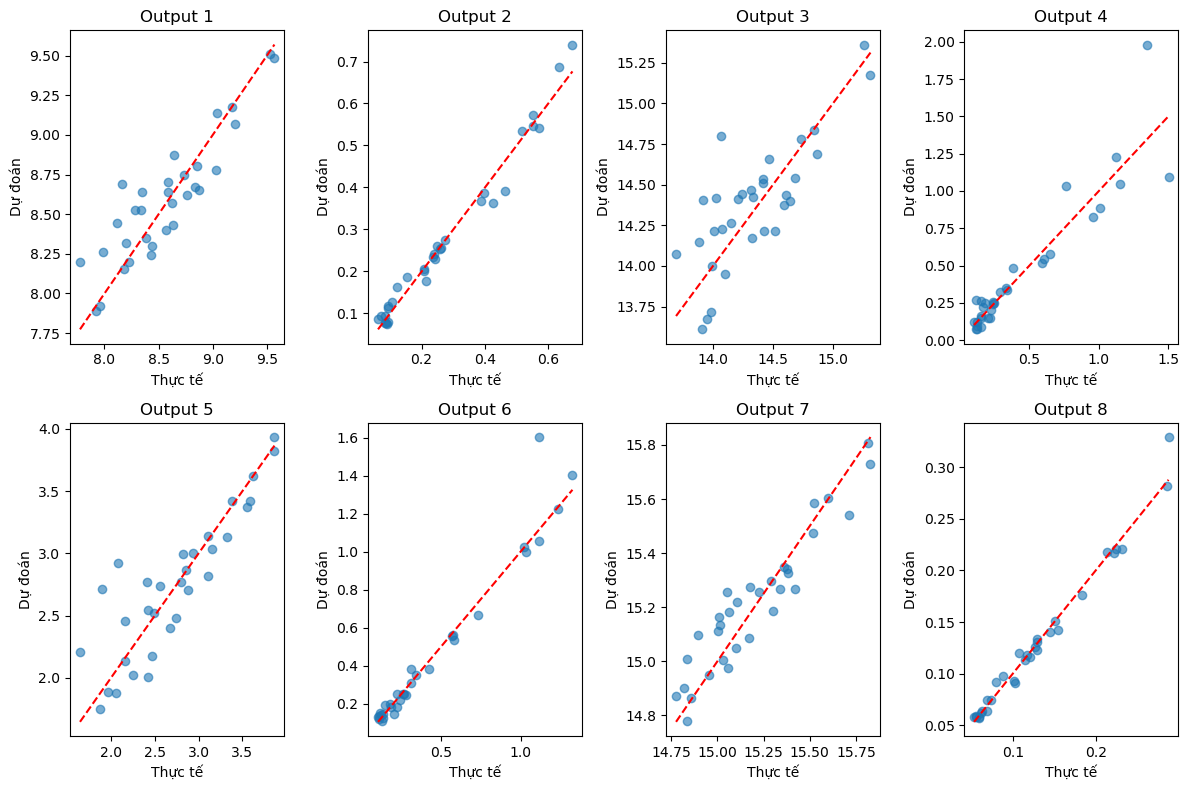

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i in range(8):  # vì có 8 output
    plt.subplot(2, 4, i+1)
    plt.scatter(y_test_np[:, i], y_pred[:, i], alpha=0.6)
    plt.plot([y_test_np[:, i].min(), y_test_np[:, i].max()],
             [y_test_np[:, i].min(), y_test_np[:, i].max()],
             'r--')
    plt.xlabel("Thực tế")
    plt.ylabel("Dự đoán")
    plt.title(f"Output {i+1}")
plt.tight_layout()
plt.show()

In [20]:
X_train_np[0]

array([ 8.223     ,  0.26008333, 14.09733333,  0.33025   ,  2.15766667,
        0.42475   , 14.81908333,  0.11758333,  8.177     ,  0.24783333,
       13.98783333,  0.33775   ,  2.25016667,  0.31025   , 14.776     ,
        0.11516667,  8.16541667,  0.25841667, 14.05333333,  0.33091667,
        2.201     ,  0.34975   , 14.87716667,  0.11691667,  8.29775   ,
        0.26225   , 14.20175   ,  0.3455    ,  2.31908333,  0.35216667,
       14.90875   ,  0.11708333,  8.5905    ,  0.25191667, 14.3145    ,
        0.31666667,  2.68708333,  0.30391667, 15.07625   ,  0.12525   ])

In [36]:
y_train_np[0]

array([ 8.59316667,  0.24616667, 14.47416667,  0.399     ,  2.64375   ,
        0.34541667, 15.14375   ,  0.13425   ])

### Tạo metric RR

In [22]:
import tensorflow.keras.backend as K

def r2_score(y_true, y_pred):
    ss_res = K.sum(K.square(y_true - y_pred))  # Residual sum of squares
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))  # Total sum of squares
    return 1 - ss_res / (ss_tot + K.epsilon())


### Sử dụng học sâu để làm

In [30]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, InputLayer

# Chuyển đổi X, y thành numpy array 3D/2D
def convert_X_3d(X_df):
    # Mỗi hàng là list 5 vector (mỗi vector 8 chiều)
    return np.array([np.stack(row) for row in X_df.values])

def convert_y_2d(y_series):
    return np.array([np.array(y) for y in y_series.values])

X_train_3d = convert_X_3d(X_train)
X_test_3d = convert_X_3d(X_test)
y_train_2d = convert_y_2d(y_train)
y_test_2d = convert_y_2d(y_test)

# Xây dựng mô hình
model = Sequential([
    InputLayer(input_shape=(5, 8)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(8)  # 8 output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae', r2_score])
model.fit(X_train_3d, y_train_2d, epochs=100, batch_size=8, verbose=0)

y_pred_dl = model.predict(X_test_3d)
# Đánh giá
loss, mae, r2 = model.evaluate(X_test_3d, y_test_2d, verbose=0)
print("Test Loss:", loss)
print("Test MAE:", mae)
print("Test R²:", r2)



c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Test Loss: 0.026887256652116776
Test MAE: 0.12161007523536682
Test R²: 0.9992771148681641


#### Biểu đồ thể hiện đầu ra thực tế và đầu ra dự đoán, đường kẻ đỏ là đường thẳng gần giống với đầu ra thực tế vì có xu hướng tăng (có thể là đường cong nhưng để trực quan thì để thành đường thẳng tính min - max)

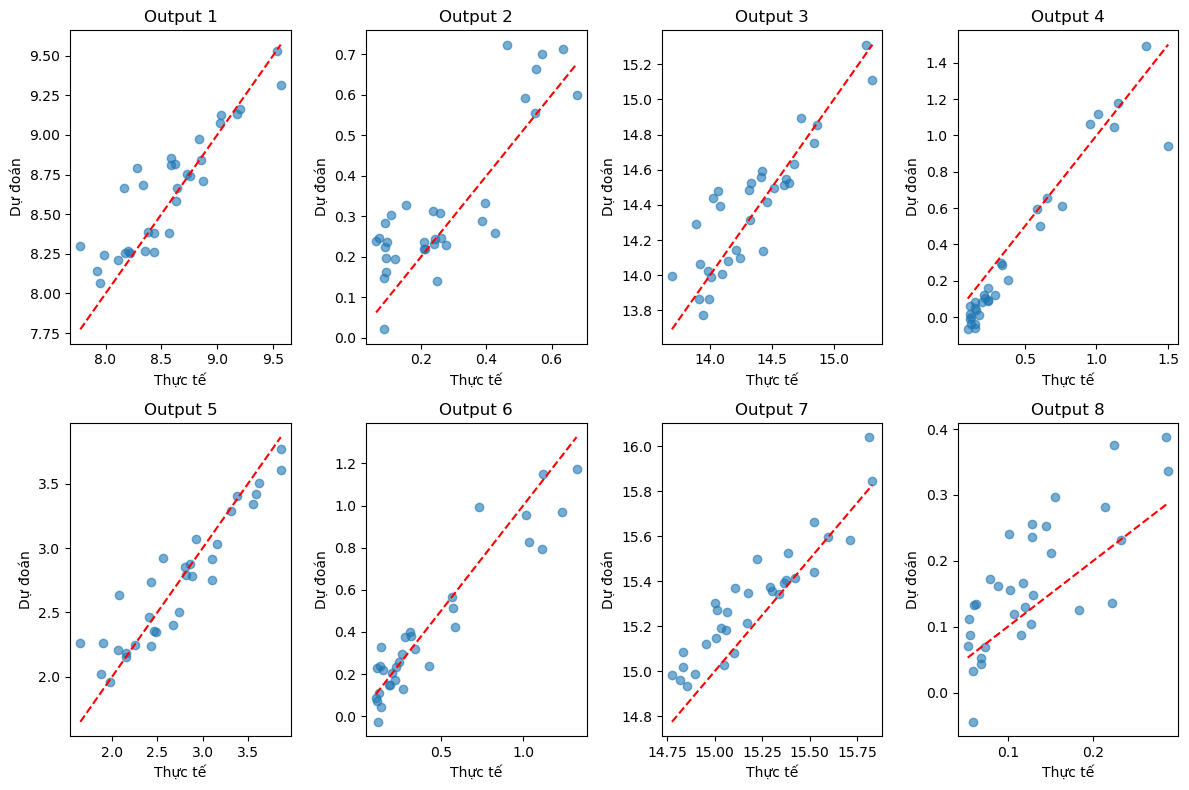

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i in range(8):  # vì có 8 output
    plt.subplot(2, 4, i+1)
    plt.scatter(y_test_2d[:, i], y_pred_dl[:, i], alpha=0.6)
    plt.plot([y_test_2d[:, i].min(), y_test_2d[:, i].max()],
             [y_test_2d[:, i].min(), y_test_2d[:, i].max()],
             'r--')
    plt.xlabel("Thực tế")
    plt.ylabel("Dự đoán")
    plt.title(f"Output {i+1}")
plt.tight_layout()
plt.show()
